## **Chapter 7: Learning from Images**
### *Distinguishing Birds and Airplane*
*  Working through an image recognition problem, step by step
*  Building Feed-Forward Neural Network (FFNN) to classify images
*  Loading data using Datasets and DataLoaders
*  Using a classification loss
*  Describing convolutional networks
*  Building a CNN to classify images

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

### **7.2.1 Importing & Normalizing the Data**

In [4]:
data_path='/content/CIFAR'

In [12]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
cifar10=datasets.CIFAR10(data_path,train=True,download=False,
                         transform=transforms.Compose([transforms.ToTensor(),
                                                       transforms.Normalize((0.4915,0.4823,0.4468),
                                                                            (0.2470,0.2435,0.2616))]))

In [10]:
cifar10_val=datasets.CIFAR10(data_path,train=False,download=False,
                             transform=transforms.Compose([transforms.ToTensor(),
                                                           transforms.Normalize((0.4915,0.4823,0.4468),
                                                                                (0.2470,0.2435,0.2616))]))

Since we want to predict whether the fed image to our model is an airplane or a bird, we intersect the CIFAR10 data and take the airplane and bird data only.

In [11]:
labelmap={0:0,2:1}
class_names=['airplane','bird']
cifar2=[(img,labelmap[label]) for img, label in cifar10 if label in [0,2]]
cifar2_val=[(img,labelmap[label]) for img, label in cifar10_val if label in [0,2]]

### **7.2.2 Bulding the Neural Network**
The image size is 32x32 pixels with 3 color channel, RGB. So, we just need to take the image pixels and color channel into a long 1 dimensional vector. The length of the vector would be 32x32x3 = 3072. Or in other words, we will have 3072 input features per image sample that will be fed to our network. 

Our model would be a nn.Linear with 3072 input features and some number of hidden features, followed by an activation function, the another nn.Linear for resulting the output, airplane or birds, thus the number of output will be 2.

In [16]:
n_input=32*32*3
n_hidden=512 #Which was chosen arbitrarily 
n_output=2 #Number of output

In [17]:
#The Model
model=nn.Sequential(nn.Linear(n_input,n_hidden),
                    nn.Tanh(),
                    nn.Linear(n_hidden,n_output))

In [24]:
#The Softmax Function
#Turns every value into normalized number which will resulted 1 as they are all summed up
def softmax(x):
  return torch.exp(x)/torch.exp(x).sum()

In [33]:
x=torch.tensor([1.0,2.0,3.0,4.0])
softmax(x)

tensor([0.0321, 0.0871, 0.2369, 0.6439])

In [34]:
softmax(x).sum()

tensor(1.)

In [36]:
#Softmax using nn Module
softmax=nn.Softmax(dim=1)
x=torch.tensor([[1.0,2.0,3.0,4.0],
                [0.5,1.0,1.5,2.0]])
softmax(x)

tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.1015, 0.1674, 0.2760, 0.4551]])

In [38]:
softmax(x).sum()

tensor(2.)

In [39]:
#The Model with Softmax at the end of our layer
model=nn.Sequential(nn.Linear(n_input,n_hidden),
                    nn.Tanh(),
                    nn.Linear(n_hidden,n_output),
                    nn.Softmax(dim=1))

In [106]:
n=9999
img,_=cifar2[n]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


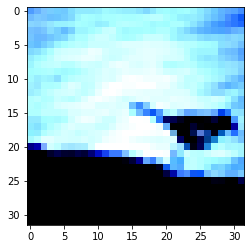

In [107]:
plt.figure(facecolor='white')
plt.imshow(img.permute(1,2,0))
plt.show()

In [108]:
img_batch=img.view(-1).unsqueeze(0)

In [109]:
#Using the output img_batch as unsqueezed vector
out=model(img_batch)
out

tensor([[0.4495, 0.5505]], grad_fn=<SoftmaxBackward>)

In [110]:
_,index=torch.max(out,dim=1)
index

tensor([1])

### **7.3 A Loss for Clasifying**